# 4th Practice - Datasets 1
## Predictive Maintenance Dataset (AI4I 2020
https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020

### Dataset Description
This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 14 features in columns
### Explicación del problema
Este dataset modela el coportamiento de una herramienta de maquinado industrial bajo ciertos factores ambientales y de su uso, el objetivo es predecir si una herramienta presentará un fallo.
## Descripción de las Colunas
1. **UID**: unique identifier ranging from 1 to 10000
2. **product ID**: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
3. **type**: just the product type L, M or H from column 2
4. **air temperature [K]**: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
5. **process temperature [K]**: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
6. **rotational speed [rpm]**: calculated from a power of 2860 W, overlaid with a normally distributed noise
7. **torque [Nm]**: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
8. **tool wear [min]**: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
9. **'machine failure'**: label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

## Descripción de las clases
1. **tool wear failure (TWF)**: the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
2. **heat dissipation failure (HDF)**: heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
3. **power failure (PWF)**: the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
4. **overstrain failure (OSF)**: if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
5. **random failures (RNF)**: each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = './predictive_maintenance.csv'
df = pd.read_csv(data)

#### Exploratory data analysis

In [4]:
print(f"Dataframe events: {df.shape[0]}")
print(f"Dataframe features: {df.shape[1]}")

Dataframe events: 10000
Dataframe features: 14


In [5]:
display(df.head())

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [6]:
col_names = df.columns
display(col_names)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [7]:
df = df.rename(columns={
    'Air temperature [K]' : 'air_temperature',
    'Process temperature [K]' : 'process_temperature',
    'Rotational speed [rpm]' : 'rotational_speed',
    'Torque [Nm]' : 'torque',
    'Tool wear [min]' : 'tool_wear'
})

In [8]:
col_names = df.columns
display(col_names)

Index(['UDI', 'Product ID', 'Type', 'air_temperature', 'process_temperature',
       'rotational_speed', 'torque', 'tool_wear', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

#### Las últimas 5 columnas representan los 5 tipos de fallas que pueden presentarse, la ausencia de positivos en las 5 columnas implica que no hubo falla

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   air_temperature      10000 non-null  float64
 4   process_temperature  10000 non-null  float64
 5   rotational_speed     10000 non-null  int64  
 6   torque               10000 non-null  float64
 7   tool_wear            10000 non-null  int64  
 8   Machine failure      10000 non-null  int64  
 9   TWF                  10000 non-null  int64  
 10  HDF                  10000 non-null  int64  
 11  PWF                  10000 non-null  int64  
 12  OSF                  10000 non-null  int64  
 13  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ MB


In [10]:
df.describe()

,UDI,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [11]:
df['Machine failure'].isna().sum()

0

In [12]:
print(df['Machine failure'].nunique())
df['Machine failure'].unique()

2


array([0, 1], dtype=int64)

In [13]:
df['Machine failure'].value_counts(normalize=False, dropna=False)

Machine failure
0    9661
1     339
Name: count, dtype: int64

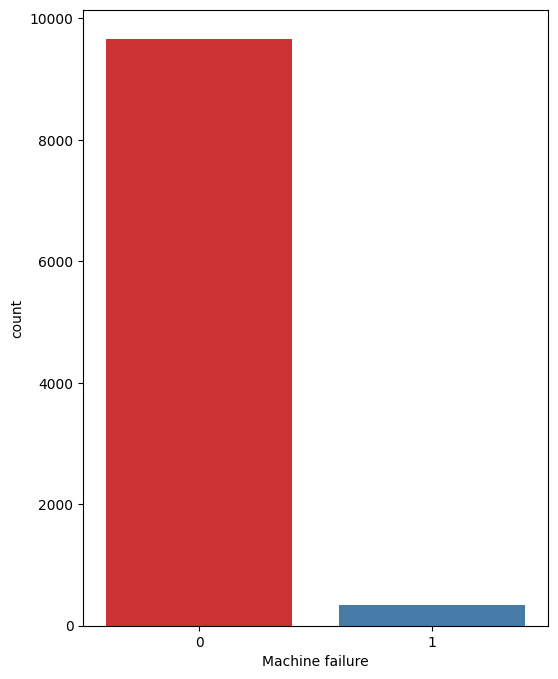

In [14]:
plt.figure(figsize=(6, 8))
sns.countplot(x="Machine failure", data=df, palette="Set1")
plt.show()

##### Evidente gran desbalance

In [15]:
failure_cols = [col for col in df.columns if col.endswith('F')]
failure_cols

['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [16]:
failure_events = df[df['Machine failure'] == 1].copy()
print(failure_events.shape[0])
failure_counts = failure_events[failure_cols].sum().sort_values(ascending=False)
failure_counts

339


HDF    115
OSF     98
PWF     95
TWF     46
RNF      1
dtype: int64

In [17]:
for failure_col in failure_cols:
    print(f"Error distribution for {failure_col}")
    print(failure_events[failure_col].value_counts(normalize=False, dropna=False),'\n')
    
for failure_col in failure_cols:
    print(f"Error distribution {failure_col} relative to the general failure cases")
    print(failure_events[failure_col].value_counts(normalize=True, dropna=False),'\n')

Error distribution for TWF
TWF
0    293
1     46
Name: count, dtype: int64 

Error distribution for HDF
HDF
0    224
1    115
Name: count, dtype: int64 

Error distribution for PWF
PWF
0    244
1     95
Name: count, dtype: int64 

Error distribution for OSF
OSF
0    241
1     98
Name: count, dtype: int64 

Error distribution for RNF
RNF
0    338
1      1
Name: count, dtype: int64 

Error distribution TWF relative to the general failure cases
TWF
0    0.864307
1    0.135693
Name: proportion, dtype: float64 

Error distribution HDF relative to the general failure cases
HDF
0    0.660767
1    0.339233
Name: proportion, dtype: float64 

Error distribution PWF relative to the general failure cases
PWF
0    0.719764
1    0.280236
Name: proportion, dtype: float64 

Error distribution OSF relative to the general failure cases
OSF
0    0.710914
1    0.289086
Name: proportion, dtype: float64 

Error distribution RNF relative to the general failure cases
RNF
0    0.99705
1    0.00295
Name: propor

In [18]:
failure_counts_df = pd.DataFrame({
    'Failure Type': failure_counts.index,
    'Count': failure_counts.values
})

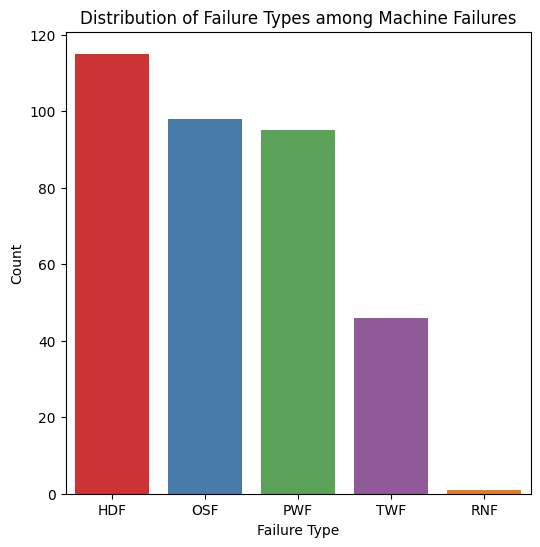

In [19]:
plt.figure(figsize=(6, 6))
sns.barplot(
    data=failure_counts_df,
    x='Failure Type',
    y='Count',
    palette='Set1'
)
plt.title('Distribution of Failure Types among Machine Failures')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

In [20]:
df['n_failures'] = df[failure_cols].sum(axis=1)

In [21]:
multiple_failures = (df['n_failures'] > 1).sum()
total_rows = len(df)

print(f"Events with multiple failures: {multiple_failures} out of {total_rows}")
print(f"Proportion relative to dataset: {multiple_failures / total_rows:.4%}")

Events with multiple failures: 24 out of 10000
Proportion relative to dataset: 0.2400%


In [22]:
df[df['n_failures'] > 1][failure_cols]


,TWF,HDF,PWF,OSF,RNF
69,0,0,1,1,0
1324,0,0,1,1,0
1496,0,0,1,1,0
3611,1,0,0,0,1
3854,0,0,1,1,0
3943,0,0,1,1,0
4254,0,1,1,0,0
4342,0,1,1,0,0
4370,0,1,0,1,0
4383,0,1,0,1,0


In [23]:
df['failure_combo'] = (
    df[failure_cols]
    .apply(lambda row: '_'.join(row.index[row == 1]), axis=1)
    .replace('', 'No_Failure')
)
multi_fail_df = df[df[failure_cols].sum(axis=1) > 1]
multi_combo_counts = multi_fail_df['failure_combo'].value_counts()

print("Multifailure combinations")
print(multi_combo_counts)

Multifailure combinations
failure_combo
PWF_OSF        11
HDF_OSF         6
HDF_PWF         3
TWF_OSF         2
TWF_RNF         1
TWF_PWF_OSF     1
Name: count, dtype: int64


### No vale la pena clasificar multifalla


In [24]:
df = df[df['n_failures'] <= 1].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9976 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  9976 non-null   int64  
 1   Product ID           9976 non-null   object 
 2   Type                 9976 non-null   object 
 3   air_temperature      9976 non-null   float64
 4   process_temperature  9976 non-null   float64
 5   rotational_speed     9976 non-null   int64  
 6   torque               9976 non-null   float64
 7   tool_wear            9976 non-null   int64  
 8   Machine failure      9976 non-null   int64  
 9   TWF                  9976 non-null   int64  
 10  HDF                  9976 non-null   int64  
 11  PWF                  9976 non-null   int64  
 12  OSF                  9976 non-null   int64  
 13  RNF                  9976 non-null   int64  
 14  n_failures           9976 non-null   int64  
 15  failure_combo        9976 non-null   object

In [25]:
df['failure_type'] = (
    df[failure_cols]
    .idxmax(axis=1)                              
    .where(df['n_failures'] == 1, 'No_Failure')  
)

In [26]:
df['failure_type'].value_counts(normalize=True) * 100

failure_type
No_Failure    96.752205
HDF            1.062550
PWF            0.801925
OSF            0.781877
TWF            0.421010
RNF            0.180433
Name: proportion, dtype: float64

In [27]:
cols_to_drop = failure_cols + ['Machine failure','n_failures','failure_combo']
df.drop(columns=cols_to_drop, inplace=True)
df.head()

,UDI,Product ID,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No_Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No_Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No_Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No_Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No_Failure


## Categorical features

In [28]:
categorical = [var for var in df.columns if df[var].dtype=='O' and var != 'Product ID']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 2 categorical variables

The categorical variables are : ['Type', 'failure_type']


In [29]:
df[categorical].head()

,Type,failure_type
0,M,No_Failure
1,L,No_Failure
2,L,No_Failure
3,L,No_Failure
4,L,No_Failure


In [30]:
df[categorical].isnull().sum()

Type            0
failure_type    0
dtype: int64

In [31]:
for var in categorical:
    print(var, ":", len(df[var].unique()), 'labels')

Type : 3 labels
failure_type : 6 labels


In [32]:
for var in categorical:
    print(df[var].value_counts(), '\n')

Type
L    5983
M    2991
H    1002
Name: count, dtype: int64 

failure_type
No_Failure    9652
HDF            106
PWF             80
OSF             78
TWF             42
RNF             18
Name: count, dtype: int64 



In [33]:
for var in categorical:
    print(df[var].value_counts(normalize=True), '\n')

Type
L    0.599739
M    0.299820
H    0.100441
Name: proportion, dtype: float64 

failure_type
No_Failure    0.967522
HDF           0.010626
PWF           0.008019
OSF           0.007819
TWF           0.004210
RNF           0.001804
Name: proportion, dtype: float64 



#### Only 'Type' as a Categorical value in the dataset

In [34]:
df_encoded = pd.concat(
    [df.drop('Type', axis=1), pd.get_dummies(df.Type, drop_first=True)],
    axis=1
)

In [35]:
df_encoded.drop(['UDI','Product ID'], axis=1, inplace=True)

In [36]:
df_encoded.head()

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,failure_type,L,M
0,298.1,308.6,1551,42.8,0,No_Failure,False,True
1,298.2,308.7,1408,46.3,3,No_Failure,True,False
2,298.1,308.5,1498,49.4,5,No_Failure,True,False
3,298.2,308.6,1433,39.5,7,No_Failure,True,False
4,298.2,308.7,1408,40.0,9,No_Failure,True,False


### Explore Numerical Variables

In [37]:
numerical = [var for var in df.columns if df[var].dtype!='O' and var not in failure_cols and var != 'Machine failure']
numerical = numerical[1:] # depreciating the ID
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['air_temperature', 'process_temperature', 'rotational_speed', 'torque', 'tool_wear']


In [38]:
df[numerical].head()

,air_temperature,process_temperature,rotational_speed,torque,tool_wear
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9


In [39]:
df[numerical].isnull().sum()

air_temperature        0
process_temperature    0
rotational_speed       0
torque                 0
tool_wear              0
dtype: int64

In [40]:
print(round(df[numerical].describe()), 2)

       air_temperature  process_temperature  rotational_speed  torque  \
count           9976.0               9976.0            9976.0  9976.0   
mean             300.0                310.0            1539.0    40.0   
std                2.0                  1.0             179.0    10.0   
min              295.0                306.0            1168.0     4.0   
25%              298.0                309.0            1424.0    33.0   
50%              300.0                310.0            1504.0    40.0   
75%              302.0                311.0            1612.0    47.0   
max              304.0                314.0            2886.0    77.0   

       tool_wear  
count     9976.0  
mean       108.0  
std         64.0  
min          0.0  
25%         53.0  
50%        108.0  
75%        162.0  
max        251.0   2


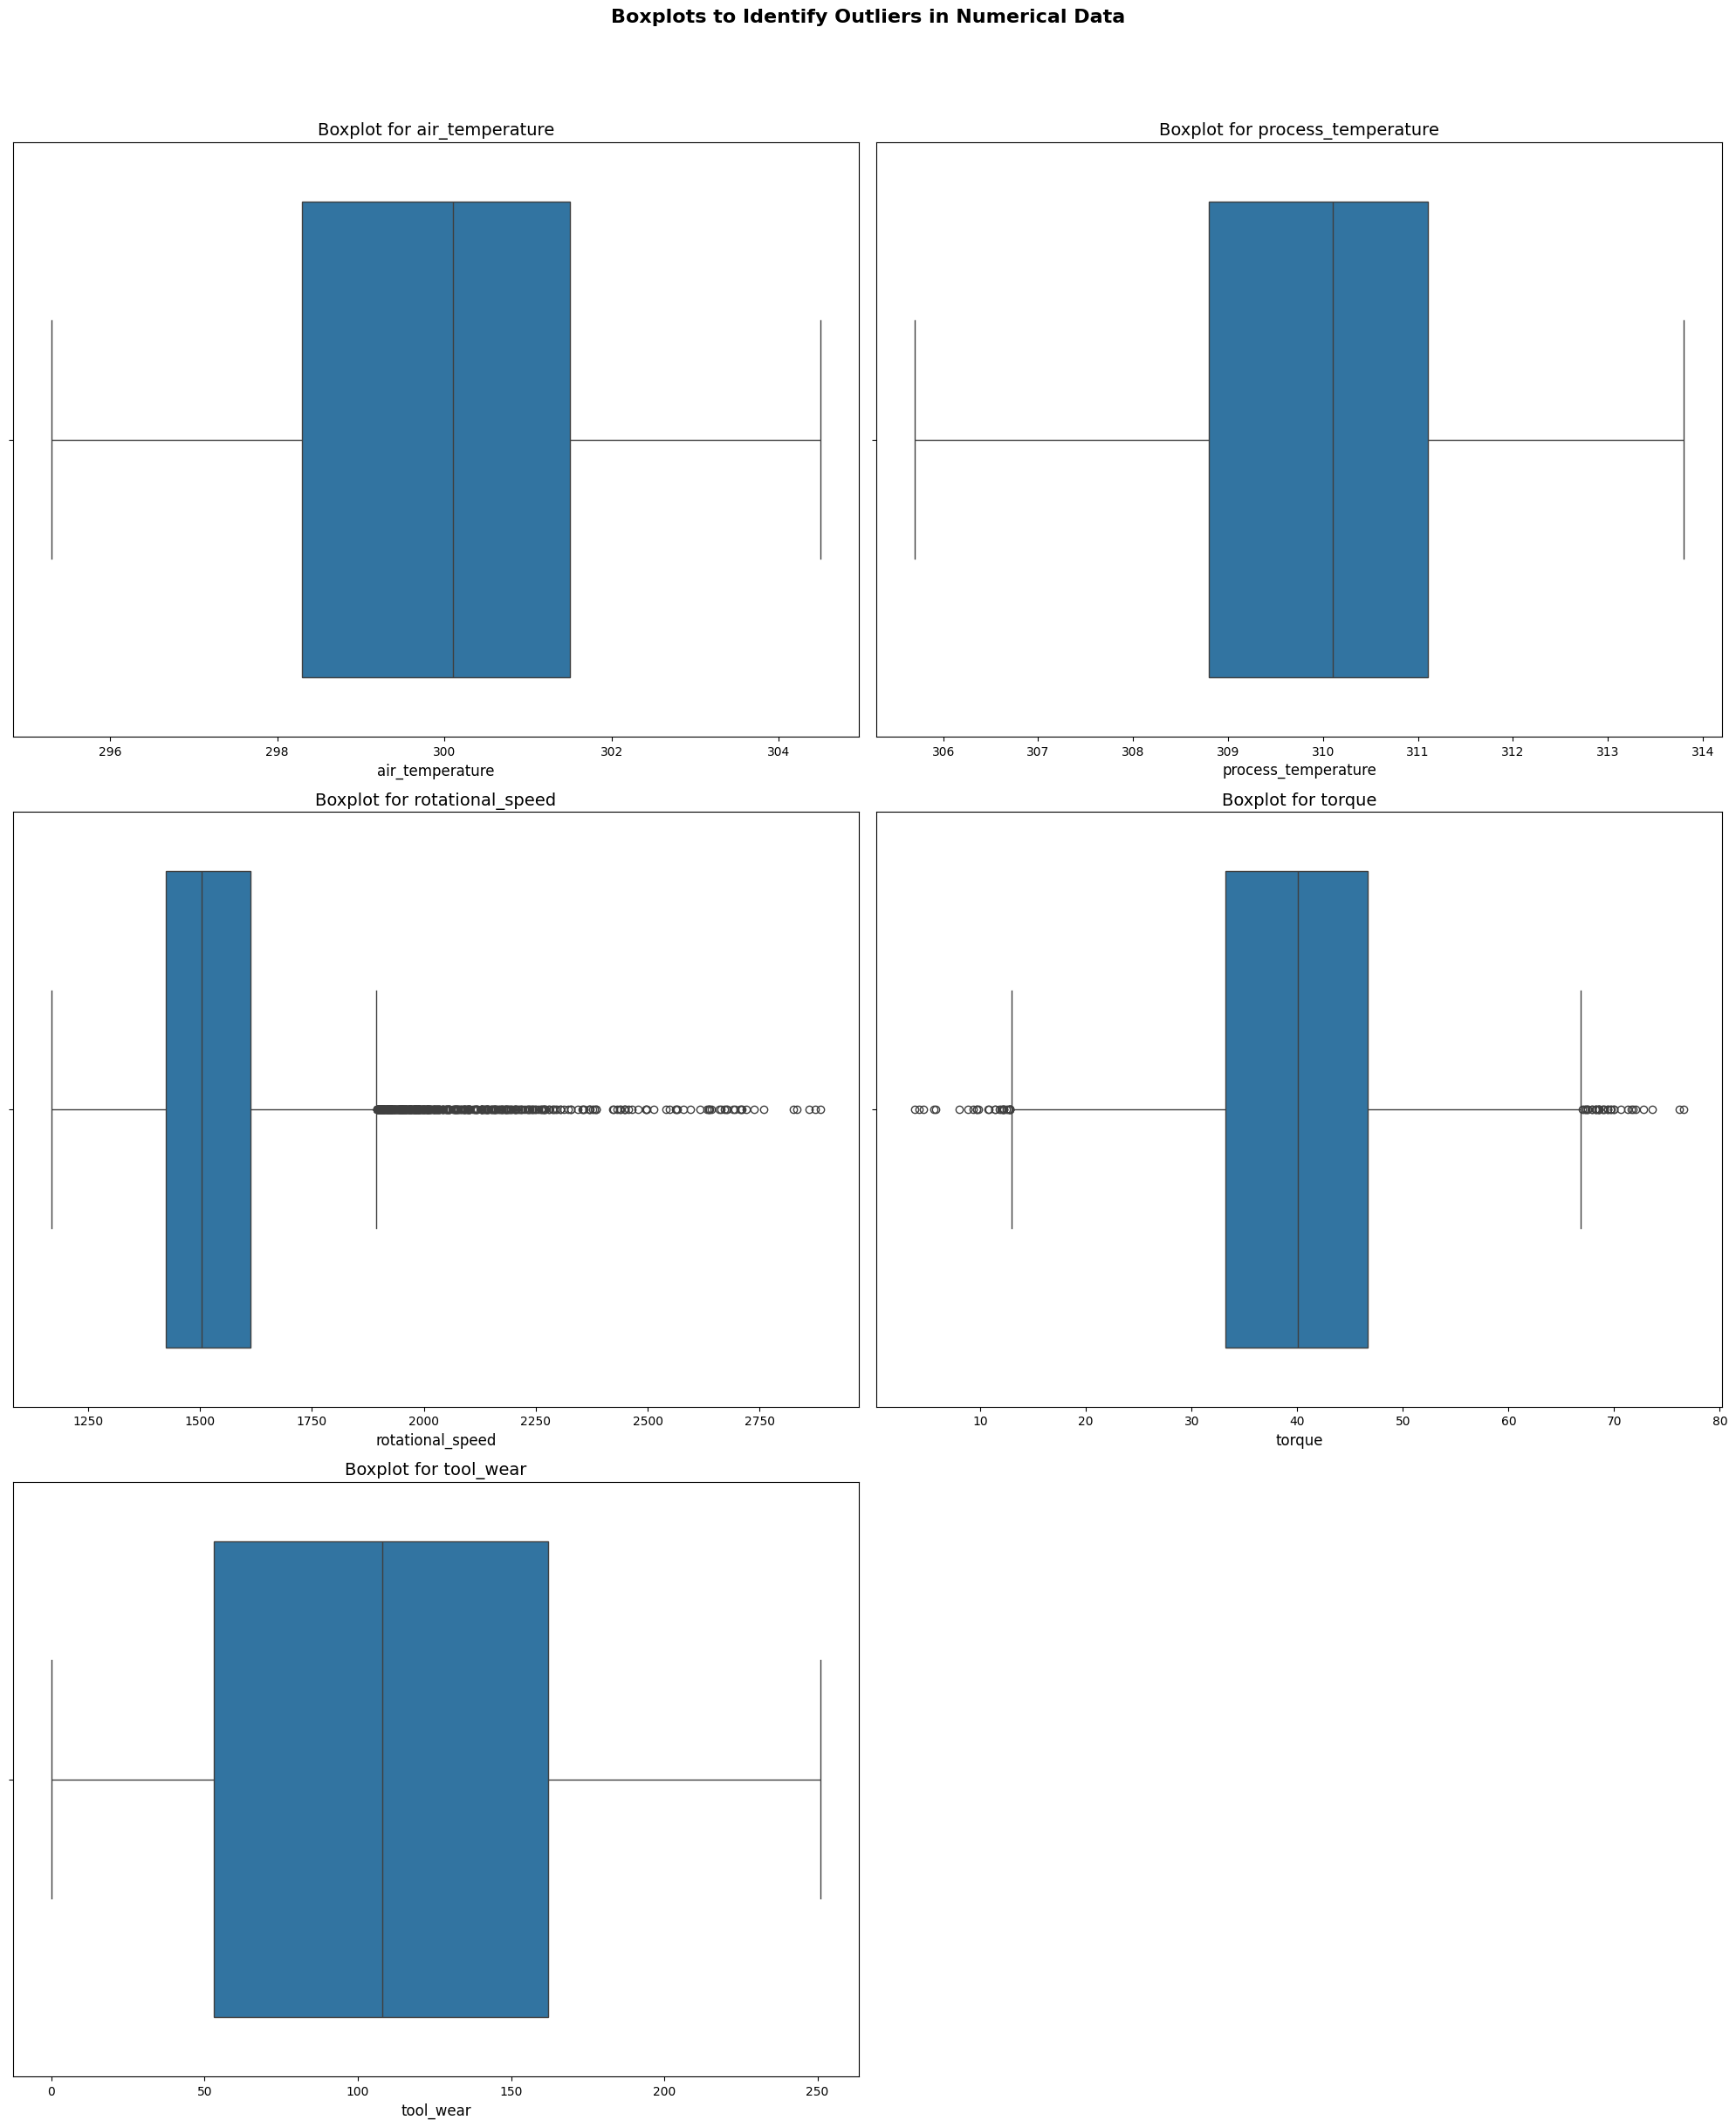

In [41]:
plt.figure(figsize=(20, 40))

# Create boxplots for each numerical column
for i, col in enumerate(numerical, 1):
    plt.subplot(len(numerical), 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

# Overall title for the entire figure
plt.suptitle("Boxplots to Identify Outliers in Numerical Data", fontsize=16, weight='bold')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

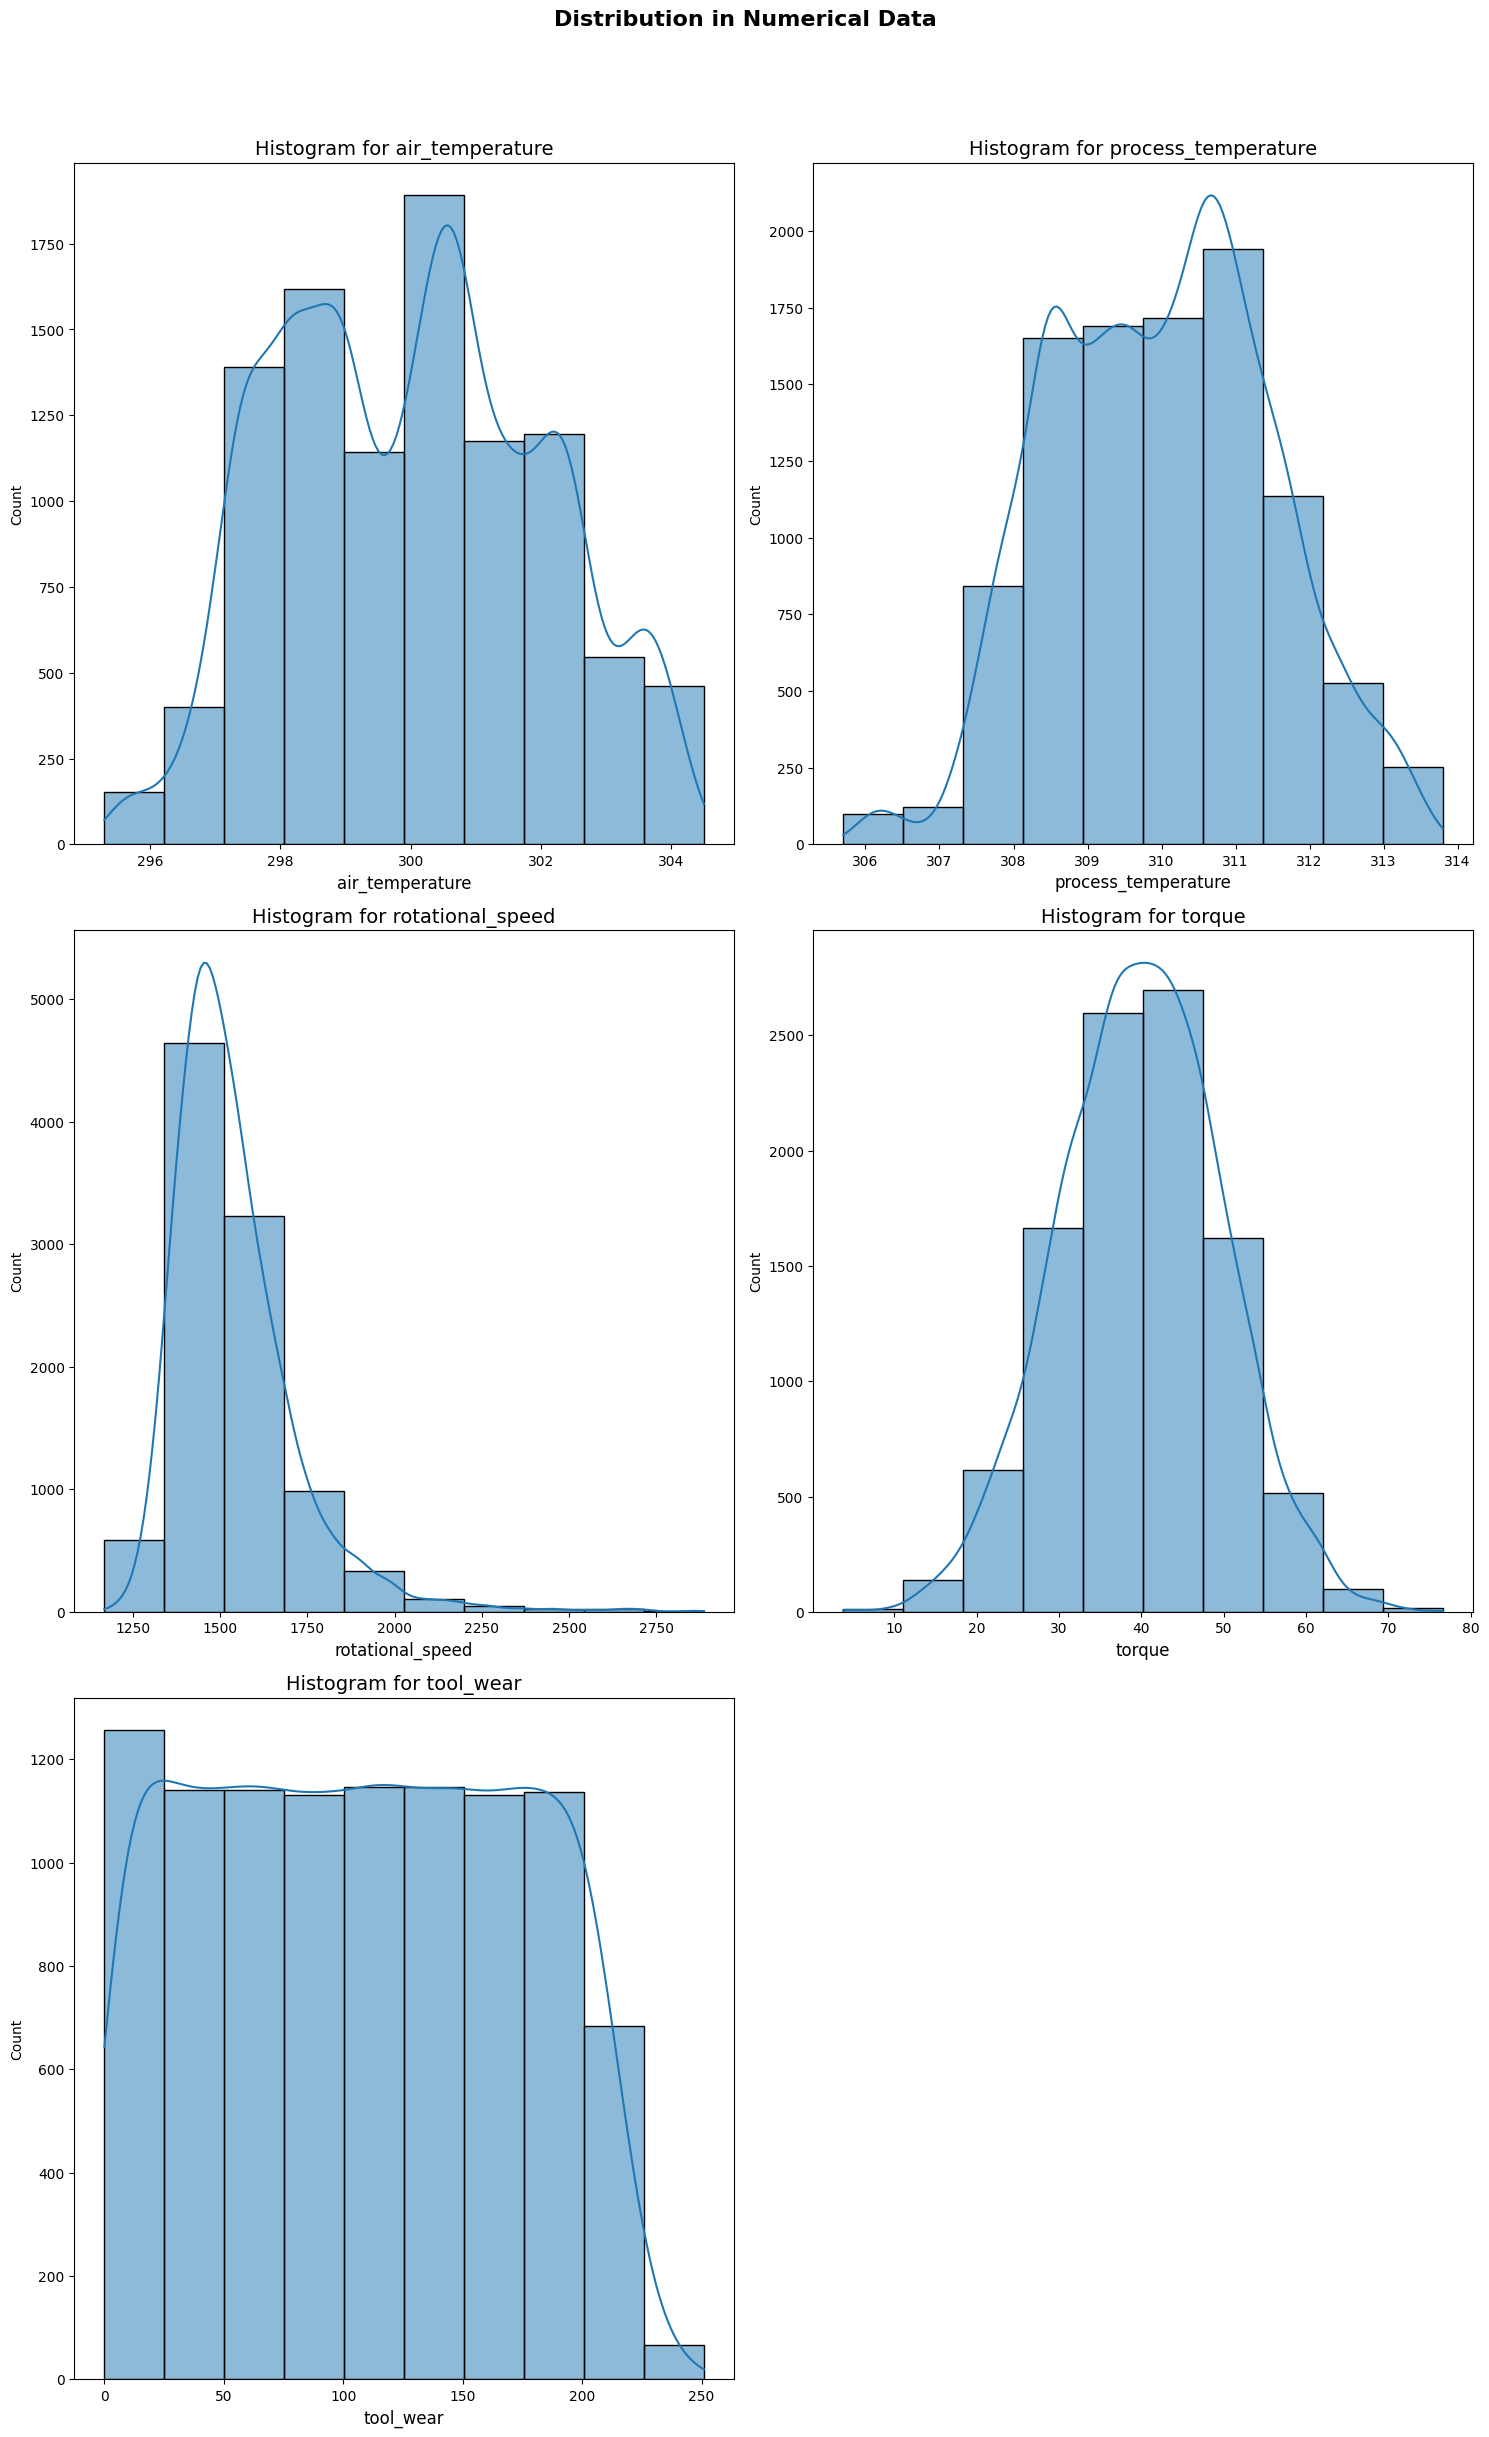

In [42]:
plt.figure(figsize=(15, 40))

for i, col in enumerate(numerical, 1):
    plt.subplot(len(numerical), 2, i)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Histogram for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

# Overall title for the entire figure
plt.suptitle("Distribution in Numerical Data", fontsize=16, weight='bold')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

In [43]:
##### IQR for Air temperature
IQR = df['air_temperature'].quantile(0.75) - df['air_temperature'].quantile(0.25)
Lower_fence = df['air_temperature'].quantile(0.25) - (IQR * 1.5)
Upper_fence = df['air_temperature'].quantile(0.75) + (IQR * 1.5)

print("'air_temperature' outliers are values < {lower} or > {upper}".format(
    lower=Lower_fence,
    upper=Upper_fence
))

'air_temperature' outliers are values < 293.5 or > 306.29999999999995


In [44]:
# IQR for Process temperature
IQR = df['process_temperature'].quantile(0.75) - df['process_temperature'].quantile(0.25)
Lower_fence = df['process_temperature'].quantile(0.25) - (IQR * 1.5)
Upper_fence = df['process_temperature'].quantile(0.75) + (IQR * 1.5)

print("'process_temperature' outliers are values < {lower} or > {upper}".format(
    lower=Lower_fence,
    upper=Upper_fence
))

'process_temperature' outliers are values < 305.35 or > 314.55000000000007


In [45]:
# IQR for Rotational speed [rpm]
IQR = df['rotational_speed'].quantile(0.75) - df['rotational_speed'].quantile(0.25)
Lower_fence = df['rotational_speed'].quantile(0.25) - (IQR * 1.5)
Upper_fence = df['rotational_speed'].quantile(0.75) + (IQR * 1.5)

print("'rotational_speed' outliers are values < {lower} or > {upper}".format(
    lower=Lower_fence,
    upper=Upper_fence
))

'rotational_speed' outliers are values < 1142.0 or > 1894.0


In [46]:
##### IQR for Torque [Nm]
IQR = df['torque'].quantile(0.75) - df['torque'].quantile(0.25)
Lower_fence = df['torque'].quantile(0.25) - (IQR * 1.5)
Upper_fence = df['torque'].quantile(0.75) + (IQR * 1.5)

print("'torque' outliers are values < {lower} or > {upper}".format(
    lower=Lower_fence,
    upper=Upper_fence
))

'torque' outliers are values < 12.950000000000003 or > 66.95


In [47]:
##### IQR for Rotational speed [rpm]
IQR = df['tool_wear'].quantile(0.75) - df['tool_wear'].quantile(0.25)
Lower_fence = df['tool_wear'].quantile(0.25) - (IQR * 1.5)
Upper_fence = df['tool_wear'].quantile(0.75) + (IQR * 1.5)

print("'tool_wear' outliers are values < {lower} or > {upper}".format(
    lower=Lower_fence,
    upper=Upper_fence
))

'tool_wear' outliers are values < -110.5 or > 325.5


#### Outliers on 'Rotational speed', 'Torque'

In [48]:
correlation_features = ['air_temperature', 'process_temperature', 'rotational_speed', 'torque', 'tool_wear', 'L', 'M']

In [49]:
correlation = df_encoded[correlation_features].corr(numeric_only=True)

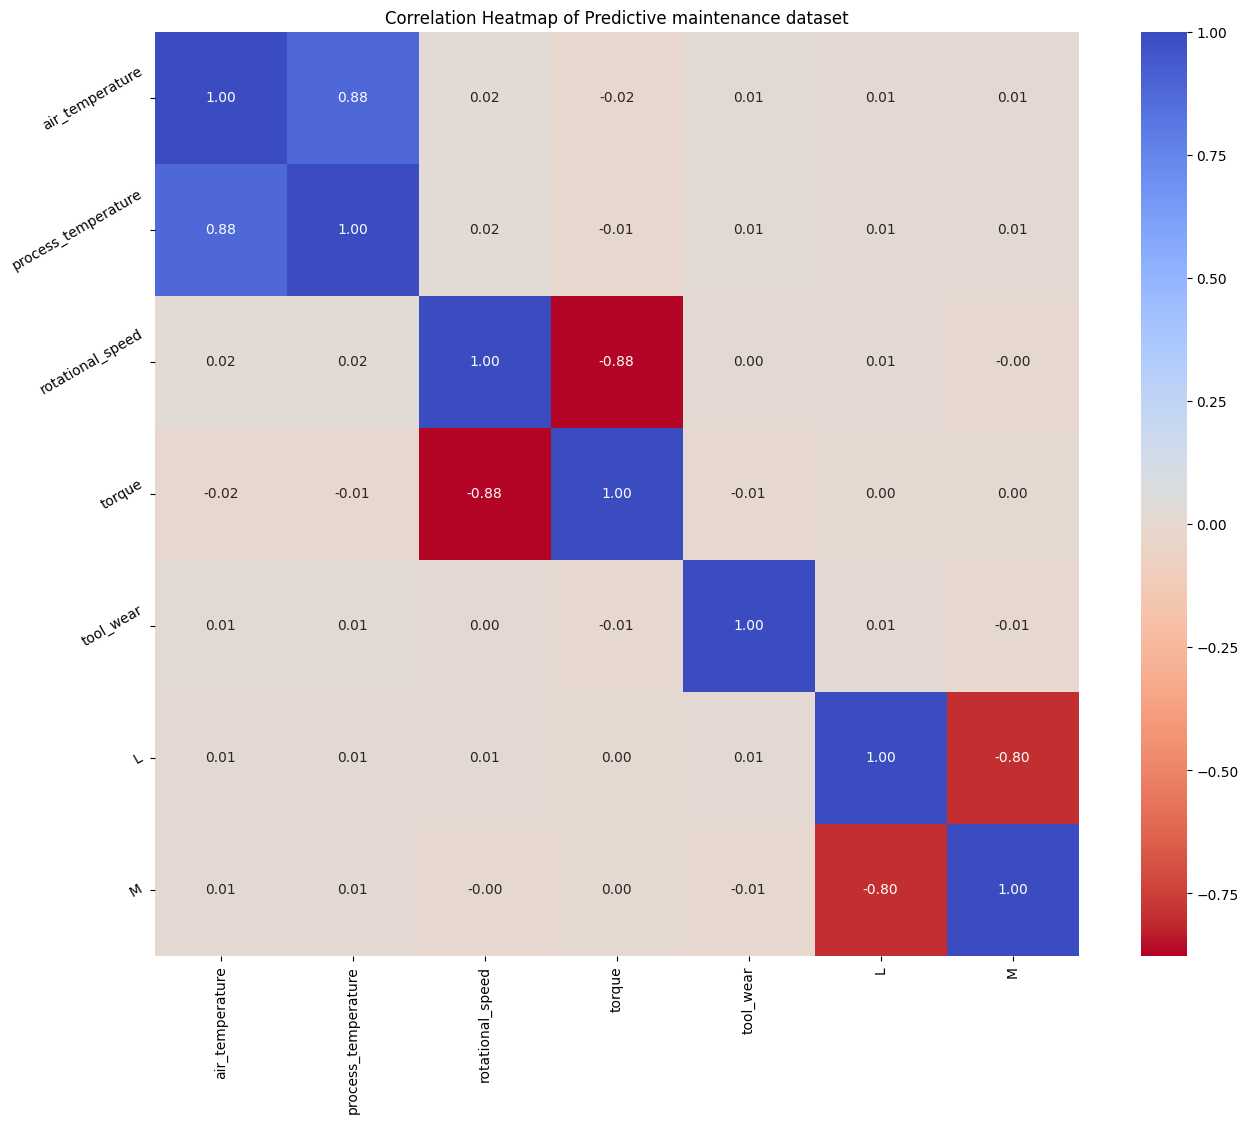

In [50]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Predictive maintenance dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', cmap='coolwarm_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [51]:
num_var = ['air_temperature', 'process_temperature']

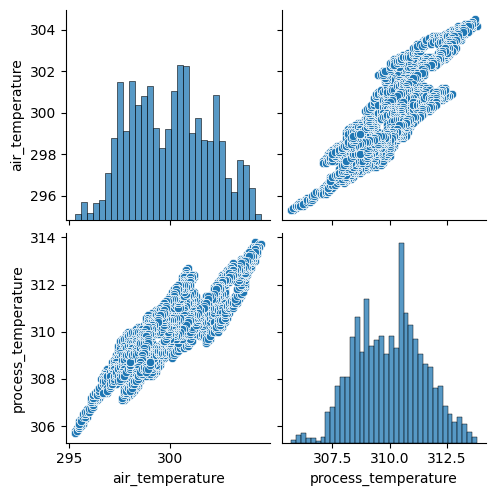

In [52]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

## Train / Test Dataset Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
non_feature_cols = ['UDI', 'Product ID']
feature_cols = [col for col in df_encoded.columns if col not in non_feature_cols]
print(f"Features: {feature_cols}")

Features: ['air_temperature', 'process_temperature', 'rotational_speed', 'torque', 'tool_wear', 'failure_type', 'L', 'M']


In [58]:
X = df_encoded.drop(columns=['failure_type'], axis=1)
X.head()

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,L,M
0,298.1,308.6,1551,42.8,0,False,True
1,298.2,308.7,1408,46.3,3,True,False
2,298.1,308.5,1498,49.4,5,True,False
3,298.2,308.6,1433,39.5,7,True,False
4,298.2,308.7,1408,40.0,9,True,False


In [61]:
y = df['failure_type']
y.describe()

count           9976
unique             6
top       No_Failure
freq            9652
Name: failure_type, dtype: object

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=67)

In [63]:
X_train.shape, X_test.shape

((7980, 7), (1996, 7))

### Winsorize outliers

In [64]:
limits_absolute = {
    'air_temperature': (293.5, 306.3),
    'process_temperature': (305.35, 314.55),
    'rotational_speed': (1142.0, 1894.0),
    'torque': (12.95, 66.95)
}

In [65]:
winsor_limits = {}
for col, (lower, upper) in limits_absolute.items():
    lower_pct = (df[col] < lower).mean()
    upper_pct = (df[col] > upper).mean()
    winsor_limits[col] = (lower_pct, upper_pct)

print(winsor_limits)

{'air_temperature': (0.0, 0.0), 'process_temperature': (0.0, 0.0), 'rotational_speed': (0.0, 0.042201283079390535), 'torque': (0.0028067361668003207, 0.0033079390537289494)}


In [71]:
from scipy.stats.mstats import winsorize
for dataset in [X_train, X_test]:
    for col in winsor_limits.keys():
        lower, upper = winsor_limits[col]
        dataset[col] = pd.Series(winsorize(dataset[col], limits=(lower, upper)), index=dataset.index)

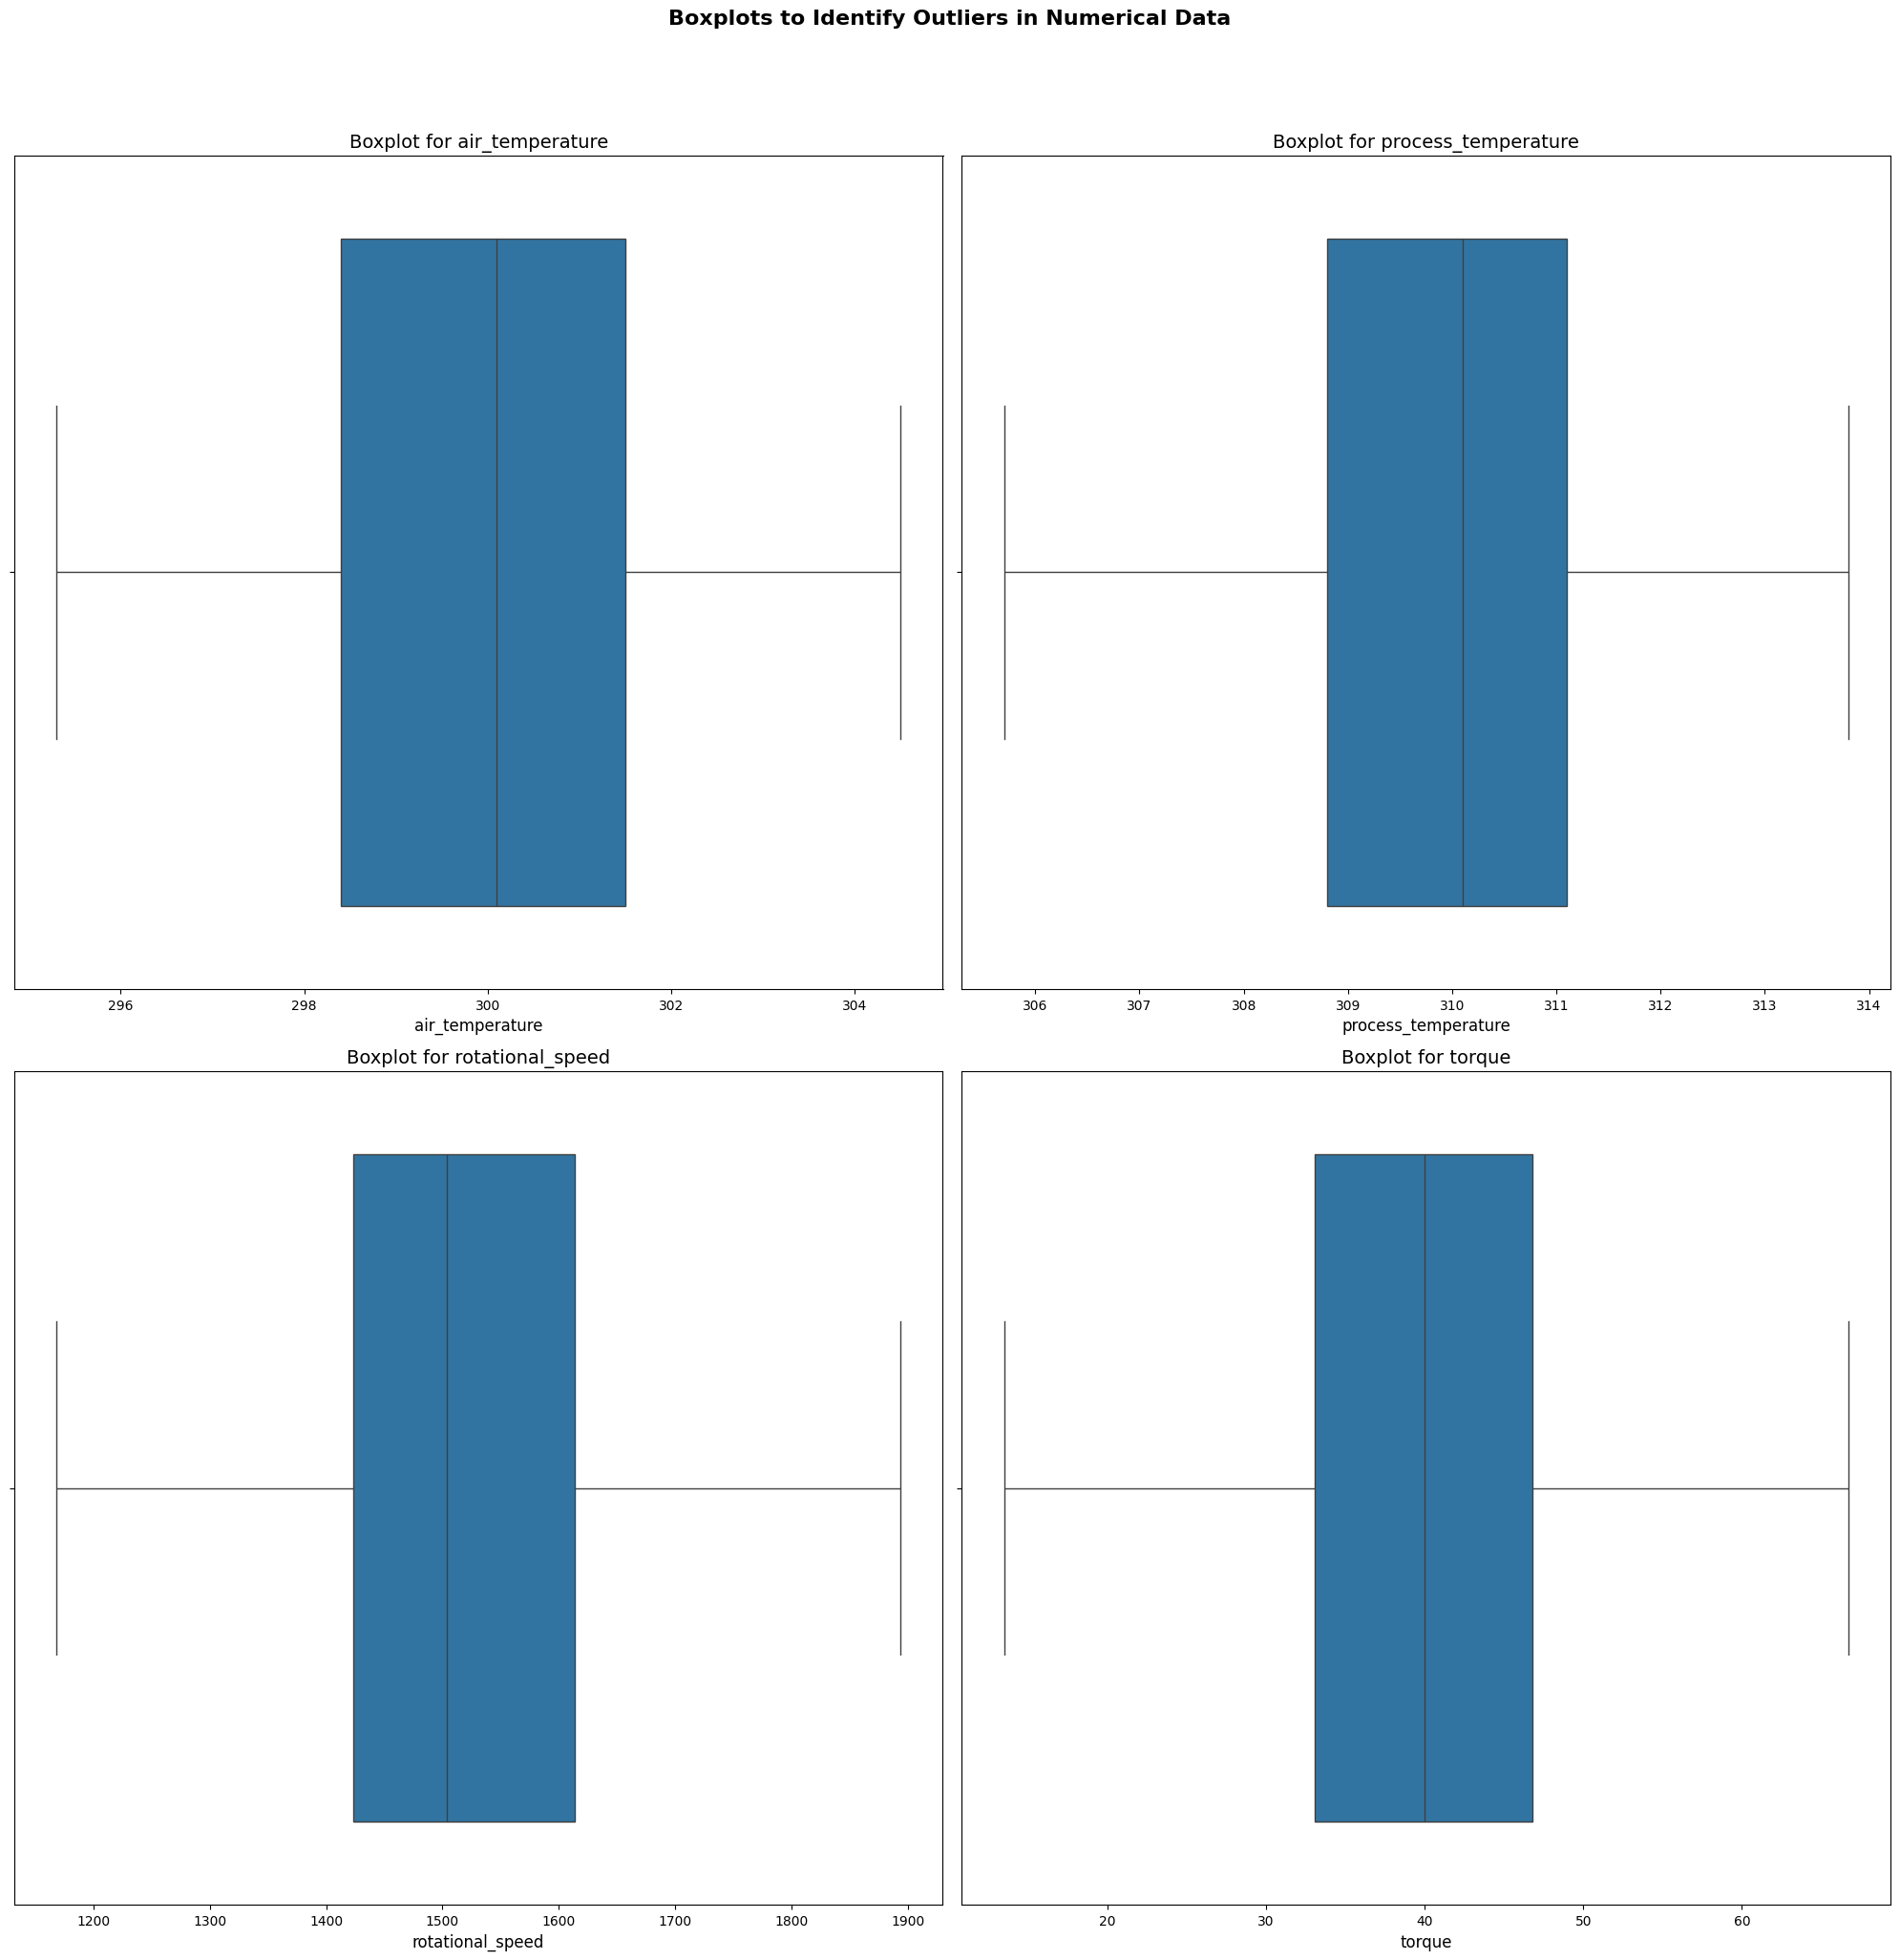

In [73]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(winsor_limits.keys(), 1):
    plt.subplot(len(winsor_limits.keys()), 2, i)
    sns.boxplot(data=X_train, x=col)
    plt.title(f"Boxplot for {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.suptitle("Boxplots to Identify Outliers in Numerical Data", fontsize=16, weight='bold')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

## Normailization

In [74]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

In [78]:
verifying_values = X_train.columns
print(f"Before normalization (train):\n {X_train[verifying_values].describe()}")
print('\n')
print(f"After normalization (train):\n {X_train_scaled[verifying_values].describe()}")

Before normalization (train):
        air_temperature  process_temperature  rotational_speed       torque  \
count      7980.000000          7980.000000       7980.000000  7980.000000   
mean        300.015652           310.009173       1531.002130    39.935113   
std           1.998613             1.485825        149.218698     9.905448   
min         295.300000           305.700000       1168.000000    13.500000   
25%         298.400000           308.800000       1423.000000    33.100000   
50%         300.100000           310.100000       1504.000000    40.000000   
75%         301.500000           311.100000       1614.000000    46.800000   
max         304.500000           313.800000       1894.000000    66.700000   

         tool_wear  
count  7980.000000  
mean    107.825313  
std      63.131059  
min       0.000000  
25%      54.000000  
50%     108.000000  
75%     161.000000  
max     251.000000  


After normalization (train):
        air_temperature  process_temperature  

In [80]:
print(f"Median: {X_train_scaled.mean().mean():.8f}") # Should be close to 0
print(f"Std: {X_train_scaled.std().mean():.8f}") # Should be close to 1

Median: -0.00000000
Std: 1.00006266


IndexError: index 3 is out of bounds for axis 1 with size 3

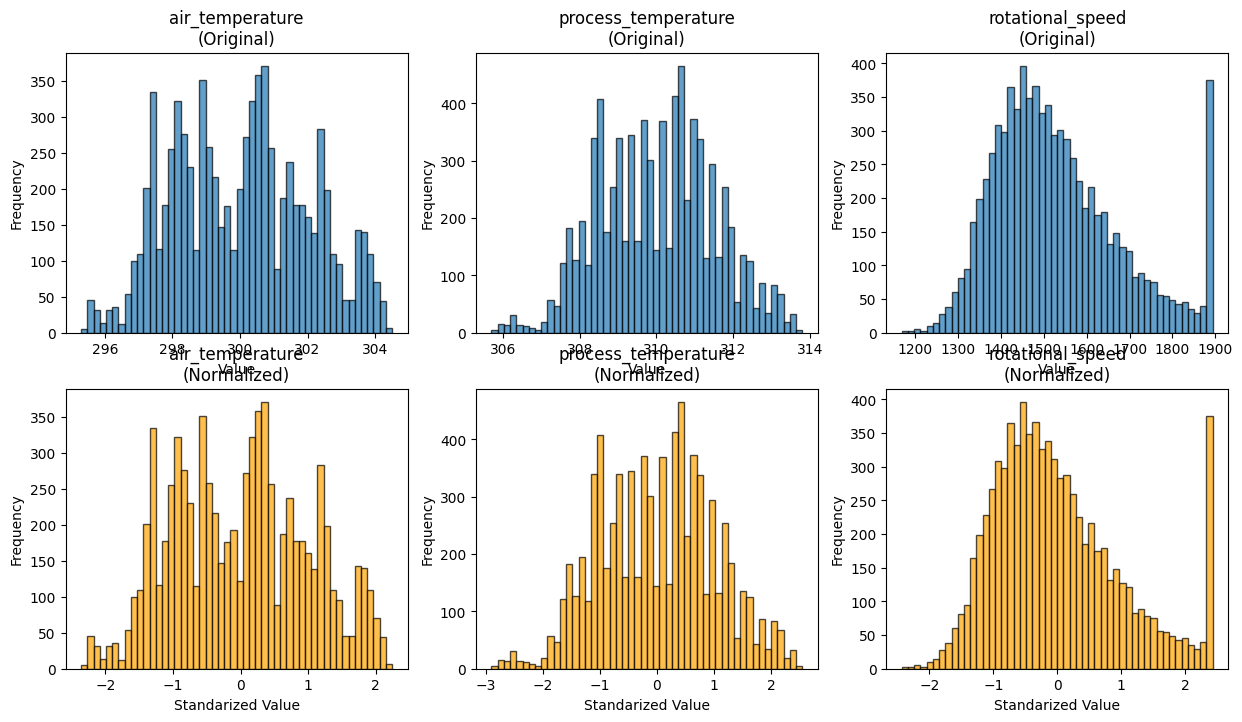

In [85]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for idx, feature in enumerate(X_train.columns):
    axes[0, idx].hist(X_train[feature], bins=50, edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'{feature}\n(Original)')
    axes[0, idx].set_xlabel('Value')
    axes[0, idx].set_ylabel('Frequency')
    
    axes[1, idx].hist(X_train_scaled[feature], bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1, idx].set_title(f'{feature}\n(Normalized)')
    axes[1, idx].set_xlabel('Standarized Value')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()